In [1]:
import pandas as pd
import geopandas as gpd
import sys
sys.path.append('../lib/')
import matplotlib.pyplot as plt
import math


import workers as workers
import sweden as sweden

In [2]:
result = pd.read_csv('../results/flows_1km_10km_sweden.csv')
grids = gpd.read_file("../results/grids_sweden/grids_1km_density_deso_with_10km_upper_grids.shp")

In [3]:
result.head()

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type
0,18,18,0.000000,0.000000,0.000000,0.000000,1
1,18,8,2.236068,1.639817,1.457747,43.436840,1
2,18,20,2.000000,1.648406,1.484936,54.296050,1
3,18,19,1.000000,1.960368,1.740077,217.184198,1
4,18,1,4.472136,1.534267,1.338410,10.859210,1


In [4]:
gdf_zones = gpd.read_file("../dbs/sweden/zones/DeSO/DeSO_2018_v2.shp")

In [5]:
grids.head()

,zone,deso,density,upper_deso,upper_dens,upper_zone,upper_xcoo,upper_ycoo,geometry
0,18,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6596000.000, 660000.000 6..."
1,8,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((659000.000 6598000.000, 659000.000 6..."
2,20,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6598000.000, 660000.000 6..."
3,19,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6597000.000, 660000.000 6..."
4,1,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((658000.000 6600000.000, 658000.000 6..."


In [6]:
agg_level=4

In [7]:
grids_dict = dict(zip(grids.zone, grids.deso))

In [8]:
result.loc[:,'ozone_deso'] = result.loc[:, 'ozone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [9]:
result.loc[:,'dzone_deso'] = result.loc[:, 'dzone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [10]:
result

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type,ozone_deso,dzone_deso
0,18,18,0.000000,0.000000,0.000000,0.000000,1,0114,0114
1,18,8,2.236068,1.639817,1.457747,43.436840,1,0114,0114
2,18,20,2.000000,1.648406,1.484936,54.296050,1,0114,0114
3,18,19,1.000000,1.960368,1.740077,217.184198,1,0114,0114
4,18,1,4.472136,1.534267,1.338410,10.859210,1,0114,0114
...,...,...,...,...,...,...,...,...,...
72778292,5028,5024,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778293,5028,5025,10.000000,1.434981,1.263294,177.537744,10,0136,0136
72778294,5028,5026,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778295,5028,5027,10.000000,1.434981,1.263294,177.537744,10,0136,0136


In [11]:
result_3 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'D_ij_data'].sum().reset_index()

In [12]:
result_3

,ozone_deso,dzone_deso,D_ij_data
0,0114,0114,2.619493e+04
1,0114,0115,6.432122e+04
2,0114,0117,9.571095e+04
3,0114,0120,2.640998e+05
4,0114,0123,1.547686e+04
...,...,...,...
2117,2583,2518,8.181201e+03
2118,2583,2583,1.955127e+05
2119,2584,2521,3.140845e+04
2120,2584,2523,4.415078e+04


In [13]:
demand_D_gt = pd.DataFrame(pd.read_csv('../results/demand_D_survey_GT.csv', converters={u'ozone_deso':str, u'dzone_deso':str, u'D_ij_data_gt':float}))

In [14]:
demand_D_gt

,ozone_deso,dzone_deso,D_ij_data_gt
0,0114,0114,8.610559e+07
1,0114,0115,3.147188e+05
2,0114,0117,7.765934e+05
3,0114,0123,7.235744e+05
4,0114,0125,3.421247e+04
...,...,...,...
3758,2584,2482,6.813357e+05
3759,2584,2523,1.416027e+06
3760,2584,2582,5.678066e+05
3761,2584,2583,7.068963e+05


In [15]:
grids_big = gpd.read_file("../dbs/sweden/zones/Deso/DeSO_2018_v2.shp")

In [16]:
grids_big.head()

,id,objectid,uuid,deso,befolkning,version,geometry
0,1.0,1,{D9661502-EE24-45AE-A1F7-C1C80F463556},0114A0010,790,2018_v2,"POLYGON ((661116.252 6606615.603, 661171.409 6..."
1,2.0,2,{5EA47309-A001-4E2A-843E-02EC8F544E4C},0114C1010,1608,2018_v2,"POLYGON ((666960.066 6598800.393, 666971.371 6..."
2,3.0,3,{0DA292ED-A306-4D7E-A392-BD063A3093E1},0114C1020,1610,2018_v2,"POLYGON ((667034.814 6600076.634, 667032.984 6..."
3,4.0,4,{18583EFC-ECC1-4D27-B520-DA294F5658FD},0114C1030,2365,2018_v2,"POLYGON ((667095.512 6599103.521, 667095.009 6..."
4,5.0,5,{6574A7B3-AD12-4A81-8EAC-773B976B72BC},0114C1040,2346,2018_v2,"POLYGON ((664610.264 6600922.821, 664638.910 6..."


In [17]:
grids_big.loc[:,'upper_deso'] = grids_big.loc[:, 'deso'].apply(lambda x: x[0:4])

In [18]:
grids_big_use = grids_big.dissolve(by='upper_deso', aggfunc='sum')

In [19]:
grids_big_use

,geometry,id,objectid,befolkning
upper_deso,,,,
0114,"POLYGON ((664663.631 6597477.443, 664653.118 6...",276.0,276,46786
0115,"POLYGON ((675775.690 6600118.275, 675631.701 6...",627.0,627,34090
0117,"POLYGON ((686822.565 6592520.451, 686041.700 6...",1242.0,1242,45574
0120,"POLYGON ((697939.414 6569646.878, 697846.459 6...",1860.0,1860,45000
0123,"POLYGON ((659903.355 6587815.099, 659877.356 6...",4380.0,4380,79990
...,...,...,...,...
2580,"POLYGON ((800857.314 7287900.809, 799591.866 7...",271147.0,271147,78105
2581,"POLYGON ((793300.542 7241240.406, 793295.100 7...",166082.0,166082,42281
2582,"POLYGON ((811093.111 7304243.942, 811106.486 7...",107181.0,107181,28080


In [20]:
upper_deso_name = list(grids_big_use.index.array)

In [21]:
dis = dict()
for i in upper_deso_name:
    element = dict()
    for j in upper_deso_name:
        delta_x = grids_big_use.geometry.loc[i].centroid.x -  grids_big_use.geometry.loc[j].centroid.x
        delta_y = grids_big_use.geometry.loc[i].centroid.y -  grids_big_use.geometry.loc[j].centroid.y
        distance = delta_x * delta_x + delta_y * delta_y
        element[j] = pow(distance, 0.5)
    dis[i] = element

In [22]:
demand_D_gt.loc[:,'distance'] = 0

In [23]:
demand_D_gt.head()

,ozone_deso,dzone_deso,D_ij_data_gt,distance
0,0114,0114,8.610559e+07,0
1,0114,0115,3.147188e+05,0
2,0114,0117,7.765934e+05,0
3,0114,0123,7.235744e+05,0
4,0114,0125,3.421247e+04,0


In [24]:
for i in demand_D_gt.index:
    demand_D_gt.loc[i, 'distance'] = dis[demand_D_gt.loc[i, 'ozone_deso']][demand_D_gt.loc[i, 'dzone_deso']]

In [25]:
demand_D_gt

,ozone_deso,dzone_deso,D_ij_data_gt,distance
0,0114,0114,8.610559e+07,0.000000
1,0114,0115,3.147188e+05,18159.440980
2,0114,0117,7.765934e+05,36988.166911
3,0114,0123,7.235744e+05,10968.190328
4,0114,0125,3.421247e+04,23796.622868
...,...,...,...,...
3758,2584,2482,6.813357e+05,374900.334599
3759,2584,2523,1.416027e+06,100904.279948
3760,2584,2582,5.678066e+05,236077.978878
3761,2584,2583,7.068963e+05,291875.304148


In [26]:
result_3.head()

,ozone_deso,dzone_deso,D_ij_data
0,0114,0114,26194.933363
1,0114,0115,64321.223450
2,0114,0117,95710.947064
3,0114,0120,264099.837727
4,0114,0123,15476.855798


In [27]:
demand_D_comparison = demand_D_gt.loc[demand_D_gt['D_ij_data_gt'] != 0, :].merge(result_3, on=['ozone_deso', 'dzone_deso'], how='inner')

In [28]:
demand_D_comparison

,ozone_deso,dzone_deso,D_ij_data_gt,distance,D_ij_data
0,0114,0114,8.610559e+07,0.000000,2.619493e+04
1,0114,0115,3.147188e+05,18159.440980,6.432122e+04
2,0114,0117,7.765934e+05,36988.166911,9.571095e+04
3,0114,0123,7.235744e+05,10968.190328,1.547686e+04
4,0114,0125,3.421247e+04,23796.622868,6.924886e+04
...,...,...,...,...,...
1407,2582,2582,9.896255e+07,0.000000,5.463082e+05
1408,2583,2518,1.329714e+06,77605.749310,8.181201e+03
1409,2583,2583,1.741866e+07,0.000000,1.955127e+05
1410,2584,2523,1.416027e+06,100904.279948,4.415078e+04


In [29]:
#distance_threshold = list(demand_D_comparison['distance'].quantile( q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]))

In [30]:
distance_use = demand_D_comparison.distance

In [31]:
distance_use = sorted(distance_use)

In [32]:
distance_use

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [33]:
distance_use_i = [] 
for i in distance_use:
    if i != 0:
        distance_use_i.append(i)



In [34]:
len(distance_use_i)

1122

In [35]:
distance_threshold = [0]
for i in range(1, 3):
    #print(i * 281 - 1)
    distance_threshold.append(distance_use_i[i * 281 - 1])

for i in range(1, 3):
    #print(562 + 280 * i - 1)
    distance_threshold.append(distance_use_i[562 + 280 * i -1])

In [36]:
distance_threshold

[0,
 20675.58349493713,
 29359.802308066424,
 39283.887507459774,
 142528.29995475247]

In [37]:
demand_D_comparison.loc[:,'level'] = 0

In [38]:
def get_level(dp, d):
    level_result = 1
    for ddpp in dp:
        if d > ddpp:
            level_result = level_result + 1
        else:
            break
    return level_result

In [39]:
for i in demand_D_comparison.index:
    demand_D_comparison.loc[i, 'level'] = get_level(  distance_threshold, demand_D_comparison.loc[i, 'distance'])

In [40]:
demand_D_comparison

,ozone_deso,dzone_deso,D_ij_data_gt,distance,D_ij_data,level
0,0114,0114,8.610559e+07,0.000000,2.619493e+04,1
1,0114,0115,3.147188e+05,18159.440980,6.432122e+04,2
2,0114,0117,7.765934e+05,36988.166911,9.571095e+04,4
3,0114,0123,7.235744e+05,10968.190328,1.547686e+04,2
4,0114,0125,3.421247e+04,23796.622868,6.924886e+04,3
...,...,...,...,...,...,...
1407,2582,2582,9.896255e+07,0.000000,5.463082e+05,1
1408,2583,2518,1.329714e+06,77605.749310,8.181201e+03,5
1409,2583,2583,1.741866e+07,0.000000,1.955127e+05,1
1410,2584,2523,1.416027e+06,100904.279948,4.415078e+04,5


In [41]:
number = []
for i in range(1, 6):
    level_percent = i
    demand_D_comparison_level = demand_D_comparison[demand_D_comparison['level'] == i]
    number.append(len(demand_D_comparison_level))


In [42]:
number

[290, 281, 281, 280, 280]

In [43]:
sum(number)

1412

In [44]:

demand_D_comparison.loc[:, 'D_ij_data_gt'] = demand_D_comparison.loc[:, 'D_ij_data_gt'] / demand_D_comparison.loc[:, 'D_ij_data_gt'].sum()
demand_D_comparison.loc[:, 'D_ij_data'] = demand_D_comparison.loc[:, 'D_ij_data'] / demand_D_comparison.loc[:, 'D_ij_data'].sum()
demand_D_comparison.head()

,ozone_deso,dzone_deso,D_ij_data_gt,distance,D_ij_data,level
0,0114,0114,0.002765,0.000000,0.000291,1
1,0114,0115,0.000010,18159.440980,0.000714,2
2,0114,0117,0.000025,36988.166911,0.001063,4
3,0114,0123,0.000023,10968.190328,0.000172,2
4,0114,0125,0.000001,23796.622868,0.000769,3


In [45]:
level_percent = 2
demand_D_comparison_level = demand_D_comparison[demand_D_comparison['level'] == level_percent]

In [46]:
demand_D_comparison_level

,ozone_deso,dzone_deso,D_ij_data_gt,distance,D_ij_data,level
1,0114,0115,0.000010,18159.440980,0.000714,2
3,0114,0123,0.000023,10968.190328,0.000172,2
5,0114,0139,0.000003,14355.346294,0.000039,2
6,0114,0160,0.000060,11281.065839,0.000005,2
7,0114,0162,0.000007,15396.115064,0.000004,2
...,...,...,...,...,...,...
1237,2082,2081,0.000117,20281.269212,0.000060,2
1239,2082,2083,0.000101,20318.658974,0.000113,2
1241,2083,2082,0.000102,20318.658974,0.000113,2
1258,2104,2181,0.000014,14192.282753,0.000094,2


(1e-07, 0.1)

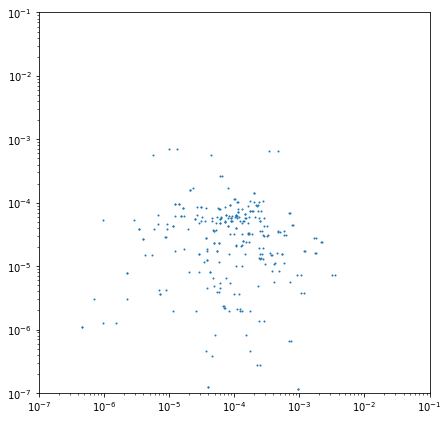

In [47]:
plt.figure(figsize=(7, 7))
plt.scatter(demand_D_comparison_level.loc[:, 'D_ij_data_gt'], demand_D_comparison_level.loc[:, 'D_ij_data'], s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0000001, 0.1)
plt.ylim(0.0000001, 0.1)

In [48]:
demand_D_comparison_level.loc[:, 'D_ij_data_min'] = demand_D_comparison_level.apply(lambda row: min(row['D_ij_data_gt'], row['D_ij_data']), axis=1)
SSI = 2 * demand_D_comparison_level.loc[:, 'D_ij_data_min'].sum() / \
      (demand_D_comparison_level.loc[:, 'D_ij_data_gt'].sum() + demand_D_comparison_level.loc[:, 'D_ij_data'].sum())
SSI

C:\Users\laptop\AppData\Local\Temp\ipykernel_2372\438709344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_D_comparison_level.loc[:, 'D_ij_data_min'] = demand_D_comparison_level.apply(lambda row: min(row['D_ij_data_gt'], row['D_ij_data']), axis=1)


0.23609301527381185

In [49]:
result_DIj_SSI = []
for level_percent in range(1, 6):
    demand_D_comparison_level = demand_D_comparison[demand_D_comparison['level'] == level_percent]
    
    demand_D_comparison_level.loc[:, 'D_ij_data_min'] = demand_D_comparison_level.apply(lambda row: min(row['D_ij_data_gt'], row['D_ij_data']), axis=1)
    SSI = 2 * demand_D_comparison_level.loc[:, 'D_ij_data_min'].sum() / \
      (demand_D_comparison_level.loc[:, 'D_ij_data_gt'].sum() + demand_D_comparison_level.loc[:, 'D_ij_data'].sum())
    result_DIj_SSI.append(SSI)

C:\Users\laptop\AppData\Local\Temp\ipykernel_2372\1898649826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_D_comparison_level.loc[:, 'D_ij_data_min'] = demand_D_comparison_level.apply(lambda row: min(row['D_ij_data_gt'], row['D_ij_data']), axis=1)
C:\Users\laptop\AppData\Local\Temp\ipykernel_2372\1898649826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_D_comparison_level.loc[:, 'D_ij_data_min'] = demand_D_comparison_level.apply(lambda row: min(row['D_ij_data_gt'], row['D_ij_data'])

In [50]:
result_DIj_SSI

[0.3707954839611602,
 0.23609301527381185,
 0.3176120245182399,
 0.4248934105620881,
 0.13117141550687517]

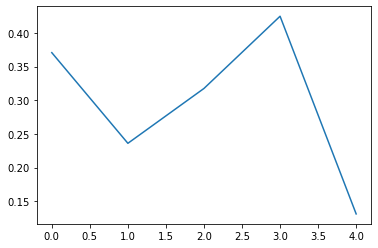

In [51]:
x = list(range(1, 10))
plt.plot(result_DIj_SSI)